# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,CircleTrip,35,1,8,Sat,HNDSUB,Indonesia,0,1,1,7.57,1
1,1,Internet,CircleTrip,7,1,11,Sat,KNOTPE,Taiwan,1,0,1,4.67,0
2,2,Internet,CircleTrip,19,1,6,Wed,LOPSYD,Australia,1,0,0,8.58,0
3,1,Internet,CircleTrip,11,1,7,Sat,PVGSUB,China,0,0,0,5.33,0
4,1,Internet,CircleTrip,76,2,2,Fri,BLRMEL,Australia,1,0,0,8.83,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Fri', 'Sun', 'Thu', 'Mon', 'Tue'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 5, 7, 4, 1, 2], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
print("The data has ",df.shape[0],"rows and ",df.shape[1], "columns")

The data has  50000 rows and  14 columns


In [9]:
print("Target variable contains :")
df['booking_complete'].value_counts()

Target variable contains :


0    42522
1     7478
Name: booking_complete, dtype: int64

In [10]:
# data types
print("Data SET:\n")
display(df.dtypes.sort_index())

Data SET:



booking_complete           int64
booking_origin            object
flight_day                 int64
flight_duration          float64
flight_hour                int64
length_of_stay             int64
num_passengers             int64
purchase_lead              int64
route                     object
sales_channel             object
trip_type                 object
wants_extra_baggage        int64
wants_in_flight_meals      int64
wants_preferred_seat       int64
dtype: object

In [11]:
# missing values
print('NUMBER OF  MISSING VALUES: \n')
display(df.isnull().sum().sort_values(ascending=False))

NUMBER OF  MISSING VALUES: 



num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [12]:
df.duplicated(keep=False).sum()

1265

In [13]:
unique_counts = df.nunique()
print("Number of unique values in each column:\n", unique_counts)

Number of unique values in each column:
 num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64


In [14]:
for col in df:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"For feature {col} range is [{min_value} to {max_value}]")

For feature num_passengers range is [1 to 9]
For feature sales_channel range is [Internet to Mobile]
For feature trip_type range is [CircleTrip to RoundTrip]
For feature purchase_lead range is [0 to 867]
For feature length_of_stay range is [0 to 778]
For feature flight_hour range is [0 to 23]
For feature flight_day range is [1 to 7]
For feature route range is [AKLDEL to URTXIY]
For feature booking_origin range is [(not set) to Vietnam]
For feature wants_extra_baggage range is [0 to 1]
For feature wants_preferred_seat range is [0 to 1]
For feature wants_in_flight_meals range is [0 to 1]
For feature flight_duration range is [4.67 to 9.5]
For feature booking_complete range is [0 to 1]


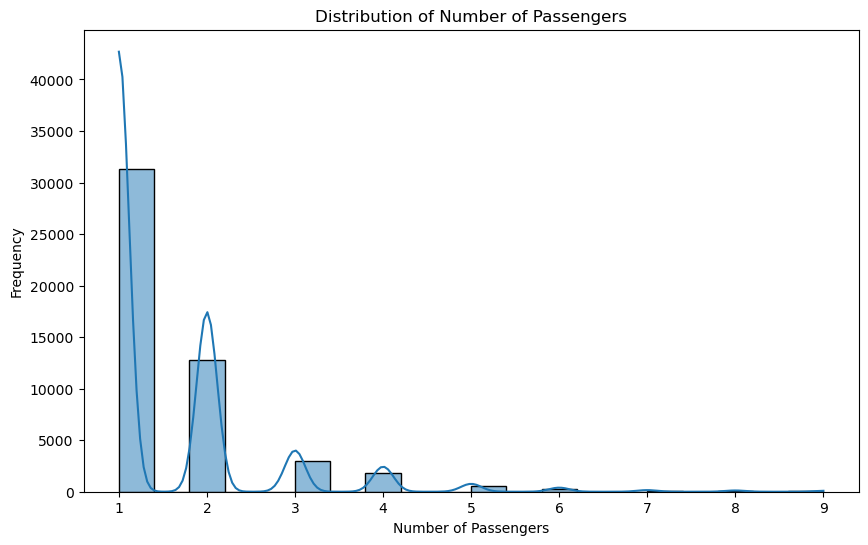

In [15]:
#Histogram of num_passengers

plt.figure(figsize=(10, 6))
sns.histplot(df['num_passengers'], bins=20, kde=True)
plt.title('Distribution of Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of the number of passengers. 
We can see whether most bookings involve a specific number of passengers or if there's variability. 

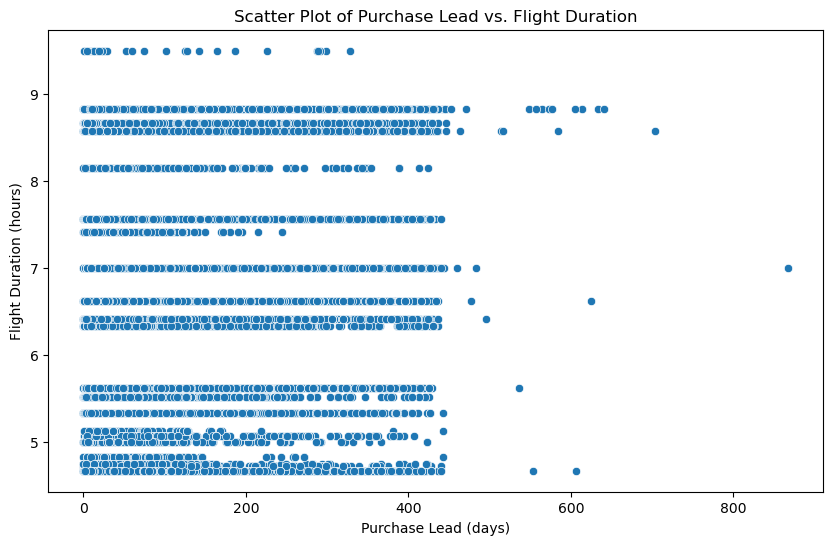

In [16]:
#scatter plot of purchase lead vs flight duration

plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_lead', y='flight_duration', data=df)
plt.title('Scatter Plot of Purchase Lead vs. Flight Duration')
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Flight Duration (hours)')
plt.show()

The scatter plot here shows that longer purchase lead are associated with longer flights

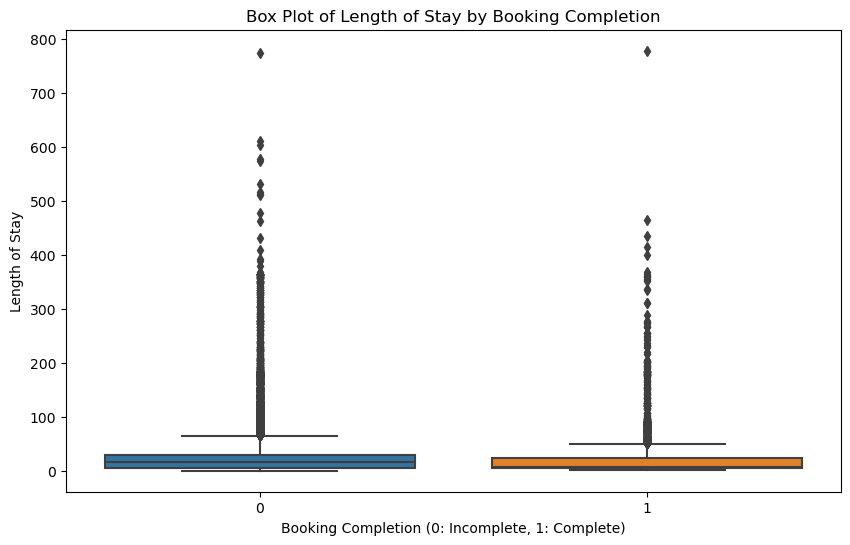

In [17]:
#box plot of lenght of stay and booking completion

plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_complete', y='length_of_stay', data=df)
plt.title('Box Plot of Length of Stay by Booking Completion')
plt.xlabel('Booking Completion (0: Incomplete, 1: Complete)')
plt.ylabel('Length of Stay')
plt.show()

The box plot shows that those whose booking were incomplete were likely to stay.

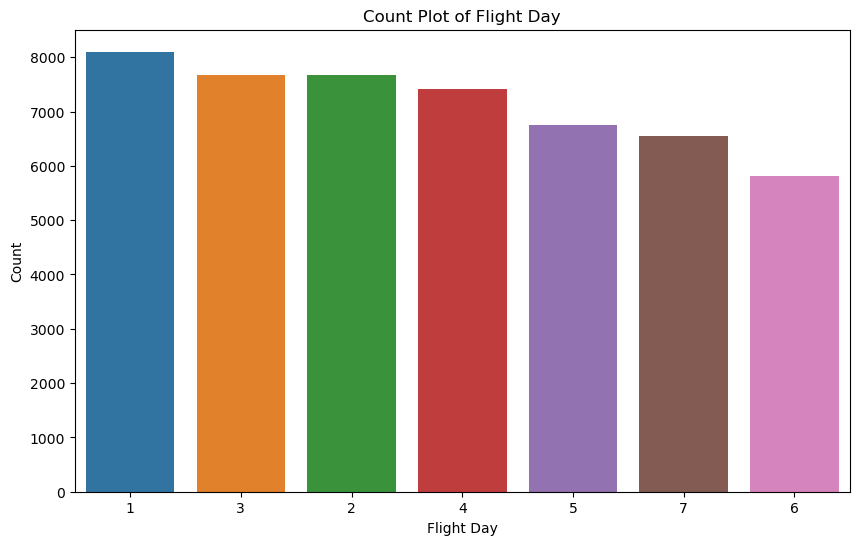

In [18]:
#Countplot of Flight Day

plt.figure(figsize=(10, 6))
sns.countplot(x='flight_day', data=df, order=df['flight_day'].value_counts().index)
plt.title('Count Plot of Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.show()

We see that monday has max nummber of flights departured and saturday being least

<Figure size 1200x800 with 0 Axes>

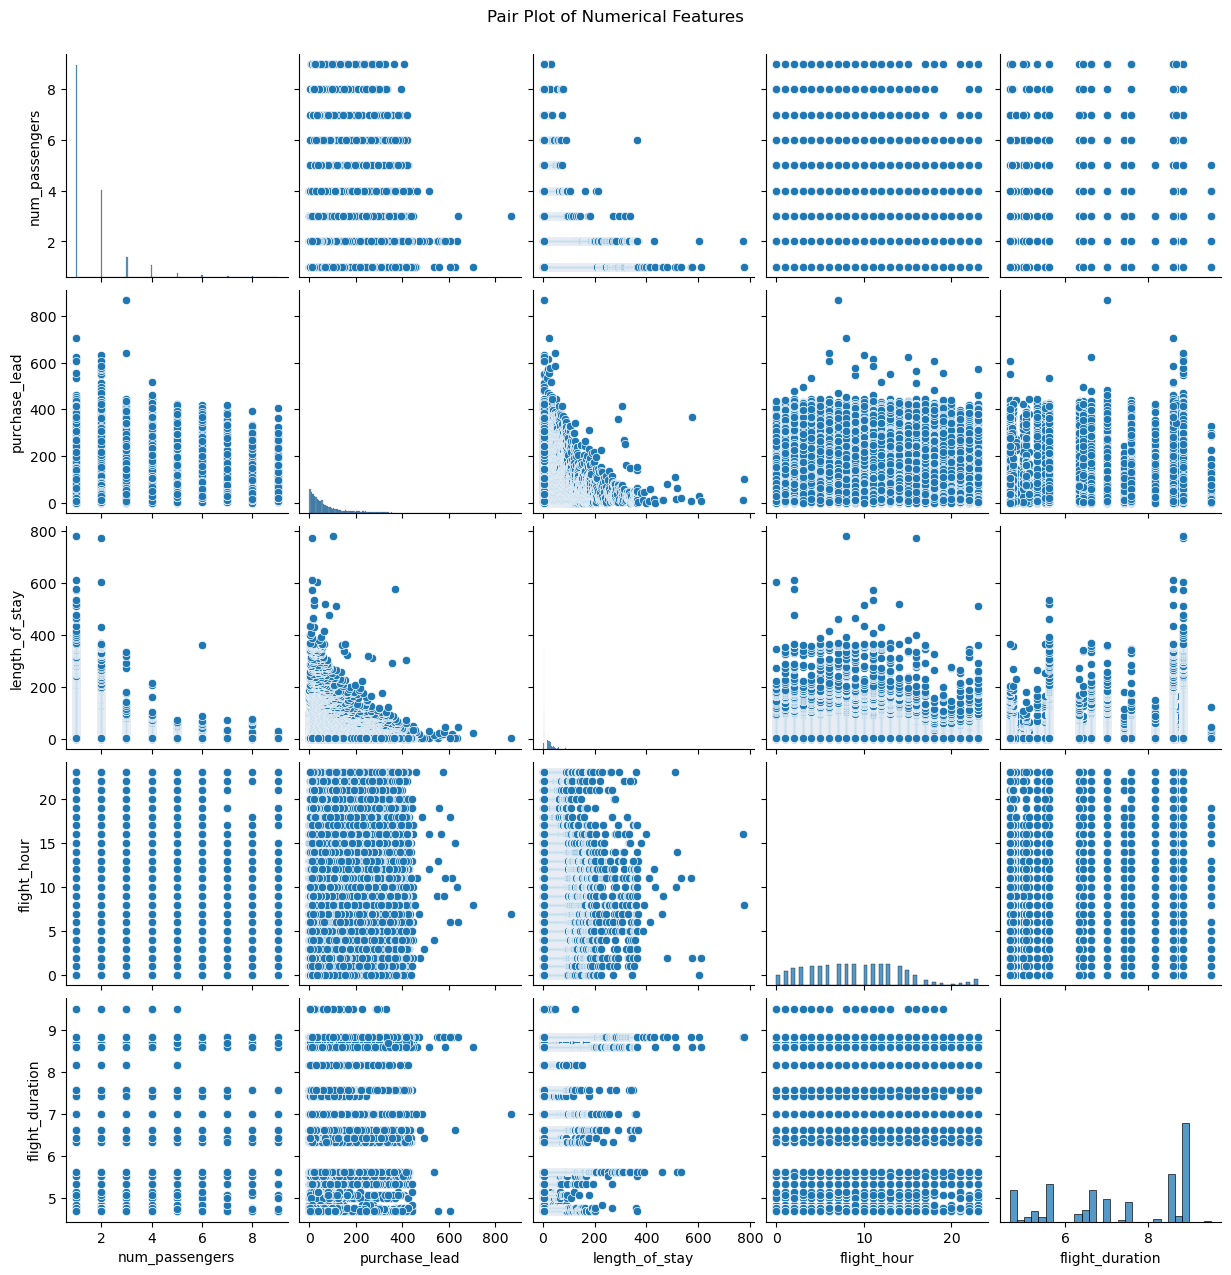

In [19]:
#pairplot for numerical features

num_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12, 8))
sns.pairplot(df[num_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

Plot here shows relationship between all numerical features with one another

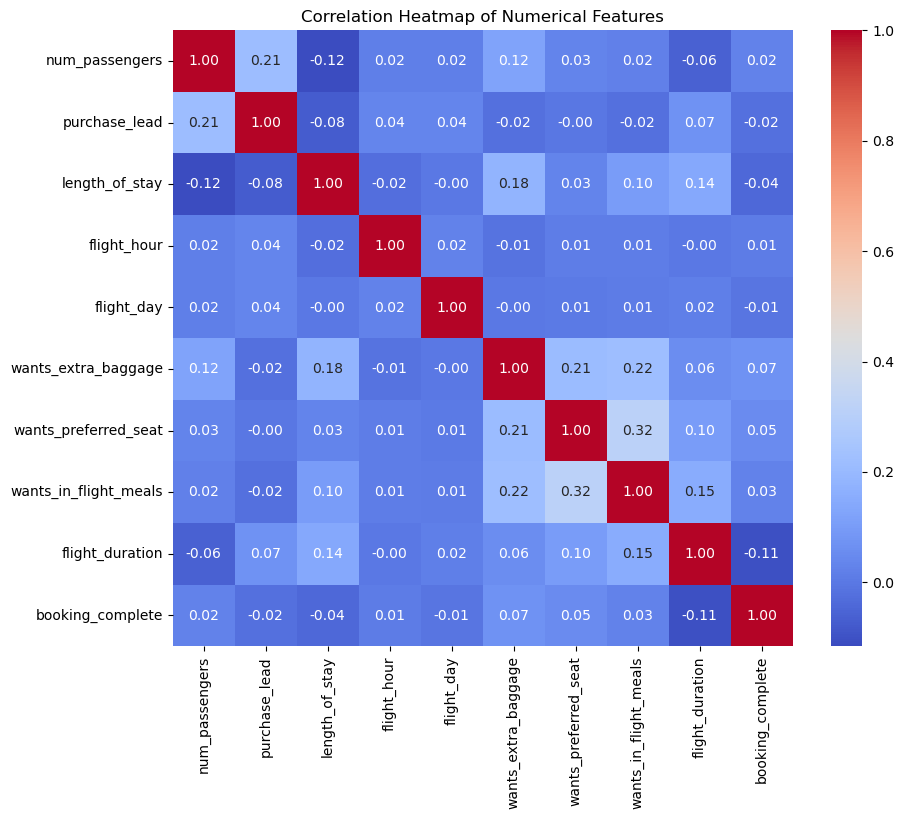

In [23]:
#Correlation Heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

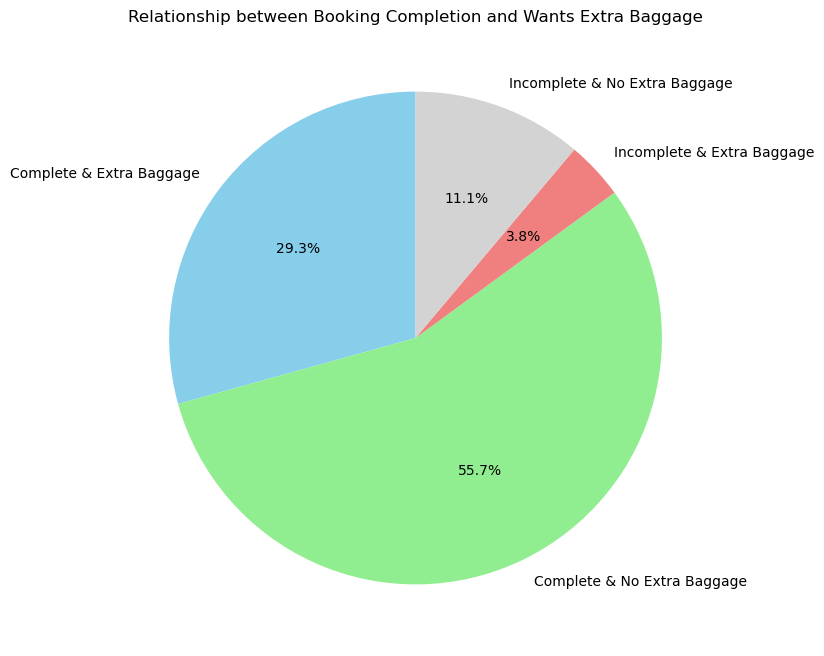

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each combination of 'booking_complete' and 'wants_extra_baggage'
relationship_counts = df.groupby(['booking_complete', 'wants_extra_baggage']).size().unstack(fill_value=0).stack()

# Extract index levels for labeling
labels = ['Complete & Extra Baggage', 'Complete & No Extra Baggage', 'Incomplete & Extra Baggage', 'Incomplete & No Extra Baggage']

# Create a pie chart with explicit labels
plt.figure(figsize=(8, 8))
plt.pie(relationship_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightgray'])
plt.title('Relationship between Booking Completion and Wants Extra Baggage')
plt.show()

In [25]:
# Count the occurrences of completed and incomplete bookings
booking_completion_counts = df['booking_complete'].value_counts()

# Calculate percentages
percent_completed_booking = booking_completion_counts.loc[1] / booking_completion_counts.sum()
percent_incomplete_booking = booking_completion_counts.loc[0] / booking_completion_counts.sum()

# Print the results
print(f"Percentage of people with completed booking: {percent_completed_booking:.2%}")
print(f"Percentage of people with incomplete booking: {percent_incomplete_booking:.2%}")

Percentage of people with completed booking: 14.96%
Percentage of people with incomplete booking: 85.04%


## Feature Selection

### Mutual_Info_Classif

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'booking_complete' is the target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']  # Target variable

# Encode categorical features (assuming they are object types)
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting data

# Calculate mi score
mi_scores = mutual_info_classif(X_train, y_train)

# feature importance scores
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Info_Score': mi_scores})
feature_importance = feature_importance.sort_values(by='Mutual_Info_Score', ascending=False)

k = 10  #top features
selected_features = feature_importance.head(k)['Feature'].tolist()

# Display the selected features
print(f"Selected Features: {selected_features}")

# Subset the dataset with selected features
X_selected = X[selected_features]

Selected Features: ['route', 'booking_origin', 'flight_duration', 'length_of_stay', 'trip_type', 'wants_extra_baggage', 'num_passengers', 'purchase_lead', 'flight_hour', 'flight_day']


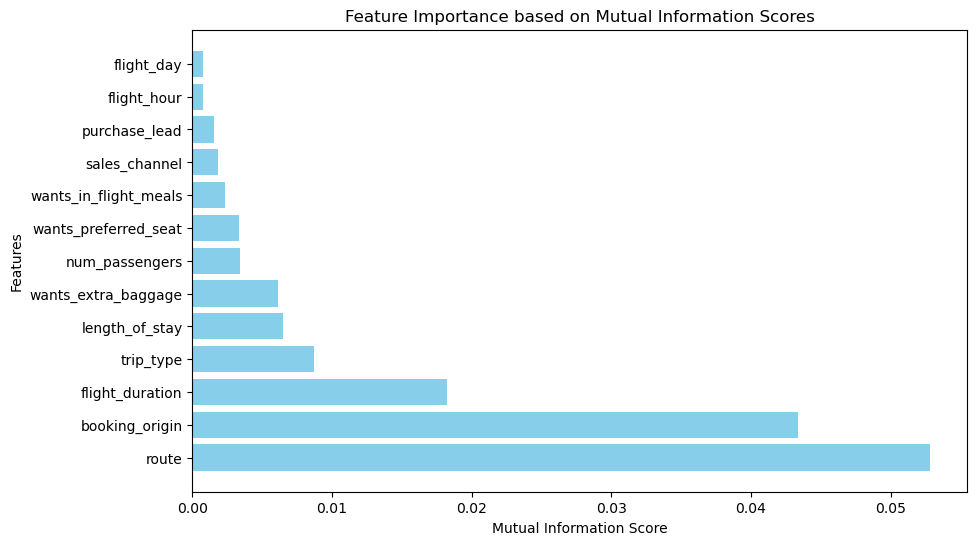

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming 'booking_complete' is the target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']  # Target variable

# Encode categorical features (assuming they are object types)
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mi_scores})

# Sort features based on importance
feature_importance = feature_importance.sort_values(by='Mutual_Info_Score', ascending=False)

# Plot a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Mutual Information Scores')
plt.show()

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data using selected features
rf_classifier.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test[selected_features])

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")

# Display classification report for more detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation to obtain more robust performance estimates
cv_accuracy = cross_val_score(rf_classifier, X[selected_features], y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2%} (+/- {cv_accuracy.std() * 2:.2%})")

Accuracy on the test set: 84.96%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8502
           1       0.49      0.12      0.19      1498

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

Cross-Validation Accuracy: 77.98% (+/- 12.59%)


## Support Vector Machine

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(random_state=42)

# Train the model on the training data using selected features
svm_classifier.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test[selected_features])

# Evaluate the model's performance on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy using Support Vector Machine on the test set: {accuracy_svm:.2%}")

Accuracy using Support Vector Machine on the test set: 85.02%


In [28]:
# Cross-validation to obtain more robust performance estimates
cv_accuracy_svm = cross_val_score(svm_classifier, X[selected_features], y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_accuracy_svm.mean():.2%} (+/- {cv_accuracy_svm.std() * 2:.2%})")

# Cross-Validation Classification Report
cv_predictions_svm = cross_val_predict(svm_classifier, X[selected_features], y, cv=5)
cv_classification_report_svm = classification_report(y, cv_predictions_svm)
print("Cross-Validation Classification Report:")
print(cv_classification_report_svm)

Cross-Validation Accuracy: 85.04% (+/- 0.01%)
Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     42522
           1       0.00      0.00      0.00      7478

    accuracy                           0.85     50000
   macro avg       0.43      0.50      0.46     50000
weighted avg       0.72      0.85      0.78     50000



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
